In [ ]:
#estimatiion statistics
!git clone "https://github.com/ACCLAB/DABEST-python.git"

In [ ]:
!pip install --upgrade dabest

In [14]:
import dabest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,Glu_4hr,Glu_24hr,Glu_60hr,GABA_4h,GABA_24h,GABA_60h,Gln_4h,Gln_24h,Gln_60h
0,15.8,12.0,11.9,2.9,2.5,2.4,6.1,4.6,4.7
1,15.2,12.9,12.4,2.6,2.4,2.2,5.8,4.5,4.6
2,14.9,11.2,11.8,2.5,2.4,2.4,5.3,4.4,4.5
3,11.7,12.0,12.2,2.5,2.3,2.5,4.5,4.4,4.9
4,12.4,12.7,11.5,2.5,2.3,2.2,4.7,4.5,4.4


In [3]:
df1  = df.drop(['Glu_60hr','GABA_4h','GABA_24h','GABA_60h','Gln_4h','Gln_24h','Gln_60h'],axis=1)
df1.head()

,Glu_4hr,Glu_24hr
0,15.8,12.0
1,15.2,12.9
2,14.9,11.2
3,11.7,12.0
4,12.4,12.7


In [4]:
#dabest implementation
stats = dabest.load(df1,idx=("Glu_4hr","Glu_24hr"))
print(stats)

DABEST v0.3.1
             
Good morning!
The current time is Sat Dec  5 11:39:54 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. Glu_24hr minus Glu_4hr

5000 resamples will be used to generate the effect size bootstraps.


In [5]:
#t-test calculations
stat_table = stats.mean_diff.statistical_tests
print(stat_table)

   control      test  ...  pvalue_mann_whitney  statistic_mann_whitney
0  Glu_4hr  Glu_24hr  ...             0.127538                    28.0

[1 rows x 17 columns]


In [6]:
mean_df  =  stats.mean_diff
print(mean_df)

DABEST v0.3.1
             
Good morning!
The current time is Sat Dec  5 11:39:58 2020.

The unpaired mean difference between Glu_4hr and Glu_24hr is -1.65 [95%CI -3.05, -0.267].
The p-value of the two-sided permutation t-test is 0.08. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


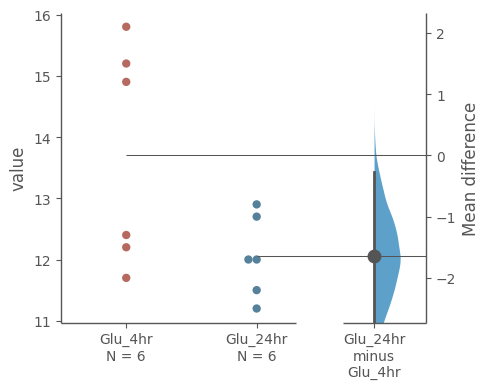

In [15]:
#plotting the data
viz  = mean_df.plot()

In [16]:
cohen = stats.cohens_d
print(cohen)

DABEST v0.3.1
             
Good morning!
The current time is Sat Dec  5 11:46:50 2020.

The unpaired Cohen's d between Glu_4hr and Glu_24hr is -1.22 [95%CI -2.77, -0.087].
The p-value of the two-sided permutation t-test is 0.08. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.cohens_d.statistical_tests`


/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


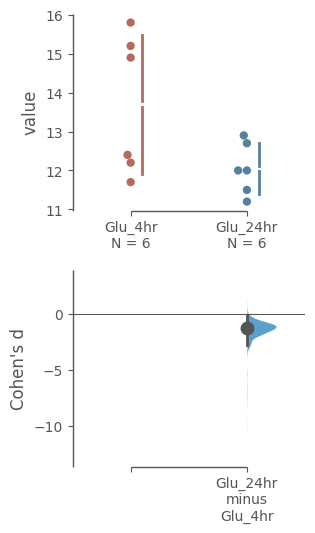

In [17]:
cohen_plot = cohen.plot(float_contrast=False)